In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import time
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('INFY.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-01,7.588750,7.900000,6.615000,6.772500,5.254817,270594400
1,2014-04-01,6.863750,6.986250,6.363750,6.713750,5.209232,250525600
2,2014-05-01,6.697500,6.865000,6.257500,6.428750,4.988100,285789600
3,2014-06-01,6.460000,6.907500,6.380000,6.721250,5.215052,238680000
4,2014-07-01,6.702500,7.062500,6.583750,6.852500,5.387232,252547200
...,...,...,...,...,...,...,...
115,2023-10-01,17.030001,18.000000,16.209999,16.420000,16.208633,177978500
116,2023-11-01,16.299999,17.750000,16.270000,17.549999,17.549999,118127400
117,2023-12-01,17.469999,18.980000,17.290001,18.379999,18.379999,121024700
118,2024-01-01,18.240000,20.370001,17.549999,19.860001,19.860001,203941000


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda x: x.toordinal())
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,735293,7.588750,7.900000,6.615000,6.772500,5.254817,270594400
1,735324,6.863750,6.986250,6.363750,6.713750,5.209232,250525600
2,735354,6.697500,6.865000,6.257500,6.428750,4.988100,285789600
3,735385,6.460000,6.907500,6.380000,6.721250,5.215052,238680000
4,735415,6.702500,7.062500,6.583750,6.852500,5.387232,252547200
...,...,...,...,...,...,...,...
115,738794,17.030001,18.000000,16.209999,16.420000,16.208633,177978500
116,738825,16.299999,17.750000,16.270000,17.549999,17.549999,118127400
117,738855,17.469999,18.980000,17.290001,18.379999,18.379999,121024700
118,738886,18.240000,20.370001,17.549999,19.860001,19.860001,203941000


In [4]:
X = df[['Date']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions
y_pred = regr.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.616324441049905
Mean Squared Error: 10.32488329112122
Root Mean Squared Error: 3.2132356420158823
R-squared: 0.6570952988723877


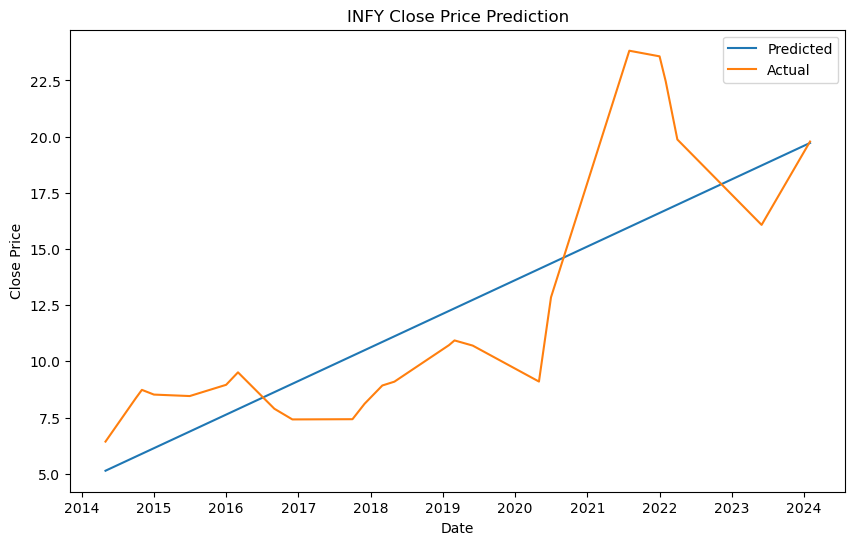

In [5]:
plt.figure(figsize=(10,6))


X_test_dates = X_test['Date'].apply(datetime.fromordinal)

sns.lineplot(x=X_test_dates, y=y_pred, label='Predicted')
sns.lineplot(x=X_test_dates, y=y_test, label='Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('INFY Close Price Prediction')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


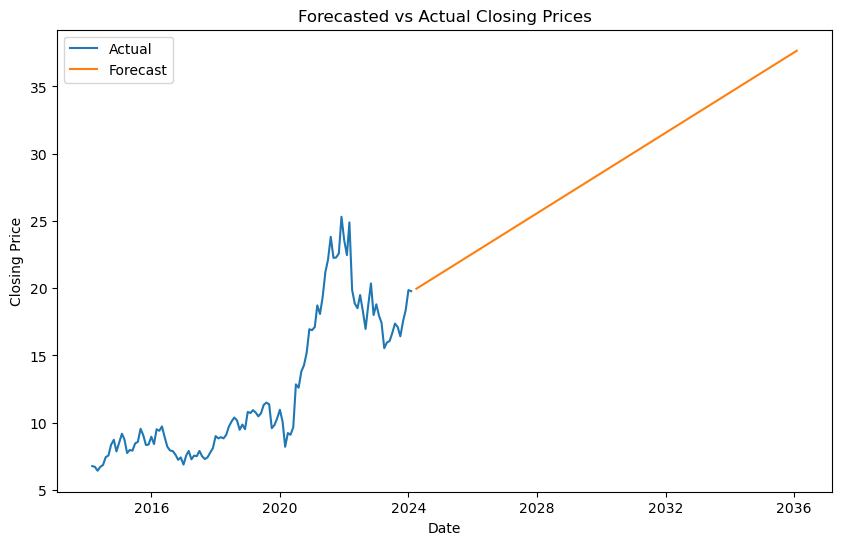

In [6]:
start_date = datetime(2024, 3, 1)
end_date = start_date + timedelta(days=12*365)
dates = pd.date_range(start=start_date, end=end_date, freq='M')

X_forecast = pd.DataFrame([d.toordinal() for d in dates])
y_forecast = regr.predict(X_forecast)
forecast_dates = [datetime.fromordinal(d) for d in X_forecast[0]]
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': y_forecast})

plt.figure(figsize=(10,6))
sns.lineplot(x=df['Date'].apply(datetime.fromordinal), y='Close', data=df, label='Actual')
sns.lineplot(x='Date', y='Forecast', data=forecast_df, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Forecasted vs Actual Closing Prices')
plt.show()

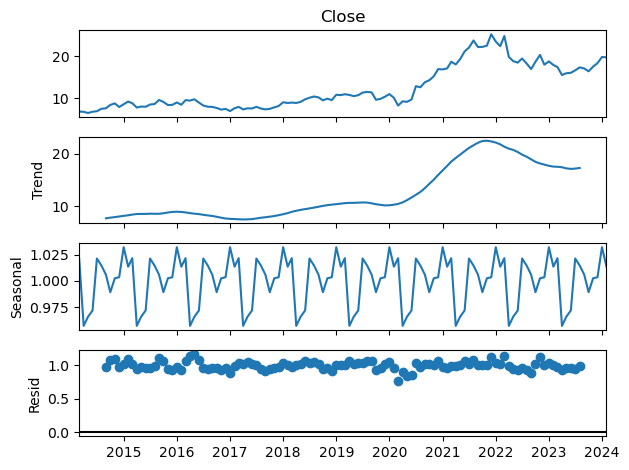

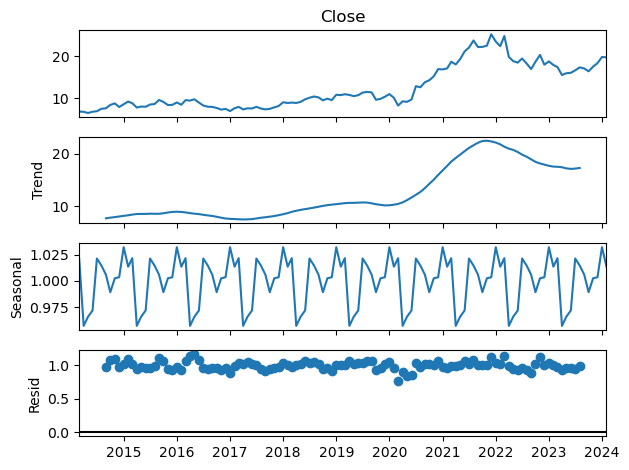

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose 

infy_df = pd.read_csv('INFY.csv', index_col='Date', parse_dates=True)

# ETS Decomposition 
result = seasonal_decompose(infy_df['Close'],  
                            model ='multiplicative') 
result.plot()

In [8]:
# To install the library 
# %pip install pmdarima 

In [9]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(infy_df['Close'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=595.677, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=361.330, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=602.358, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=383.233, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=349.863, Time=0.47 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=573.509, Time=0.21 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=350.101, Time=0.42 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=350.062, Time=0.40 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=472.583, Time=0.32 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=352.034, Time=0.60 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=349.22

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(1, 0, 0)x(2, 1, [1], 12)   Log Likelihood                -166.606
Date:                              Thu, 29 Feb 2024   AIC                            343.211
Time:                                      09:56:12   BIC                            356.622
Sample:                                  03-01-2014   HQIC                           348.649
                                       - 02-01-2024                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9870      0.015     66.348      0.000       0.958       1.016
ar.S.L12      -0.0344      0.263     -0.131      0.896      -0.551       0.482
ar.S.L24      -0.1485      0.212     -0.701      0.484      -0.564       0.267
ma.S.L12      -0.7576      0.297     -2.550      0.011      -1.340      -0.175
sigma2         1.1191      0.141      7.957      0.000       0.843       1.395
===================================================================================
Ljung-Box (L1) (Q):                   1.33   Jarque-Bera (JB):                50.77
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               6.70   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
X = infy_df.index
y = infy_df['Close']

train = infy_df.iloc[:len(infy_df)-12] 
test = infy_df.iloc[len(infy_df)-12:]

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -149.797
Date:                            Thu, 29 Feb 2024   AIC                            309.594
Time:                                    09:59:05   BIC                            322.363
Sample:                                03-01-2014   HQIC                           314.754
                                     - 02-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1241      0.095     -1.301      0.193      -0.311       0.063
ar.S.L12       0.0435      0.414      0.105      0.916      -0.767       0.854
ar.S.L24      -0.0964      0.261     -0.369      0.712      -0.608       0.415
ma.S.L12      -0.7903      0.462     -1.709      0.087      -1.696       0.116
sigma2         1.2033      0.212      5.664      0.000       0.787       1.620
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                30.65
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               7.94   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

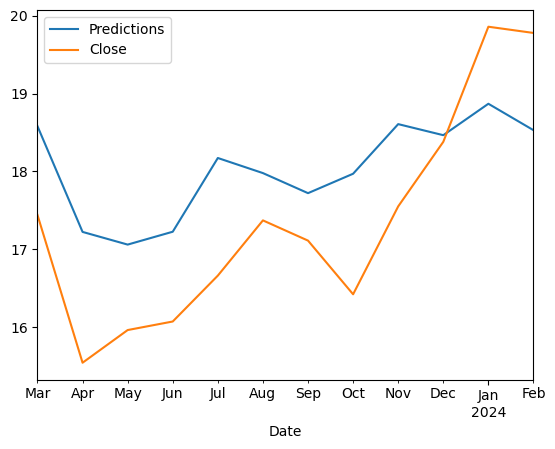

In [15]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Close'].plot(legend = True) 

In [18]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error
# Calculate mean squared error 
rmse(test["Close"], predictions), mean_squared_error(test["Close"], predictions)

(1.1464353971652528, 1.3143141198734507)

<Axes: xlabel='Date'>

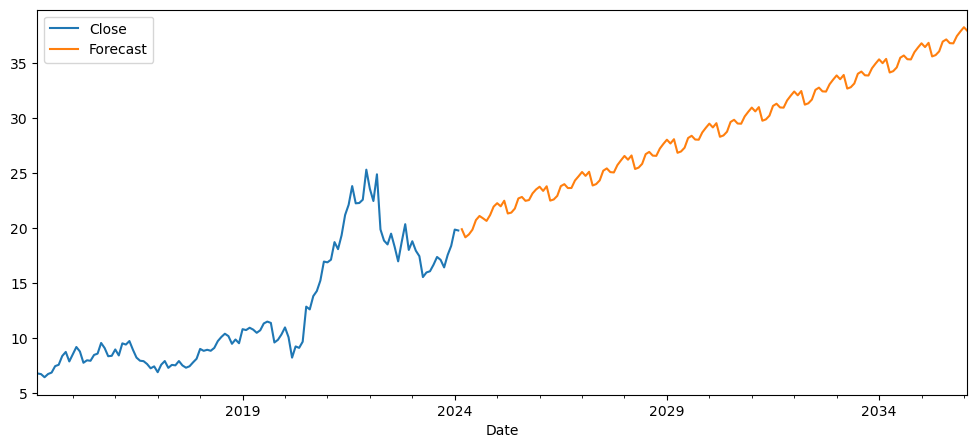

In [20]:
# Train the model on the full dataset 
model = model = SARIMAX(infy_df['Close'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result = model.fit()
  
# Forecast for the next 12 years 
forecast = result.predict(start = len(infy_df),  
                          end = (len(infy_df)-1) + 12 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
infy_df['Close'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 